In [2]:
def get_float_rep_class(BASE, PRECISION, L, U):
    class FloatRep:
        def __init__(self, mantissa, exponent, sign):
            """Return a floating point number.
            
            Arguments:
            mantissa -- a list of integers of length PRECISION
            exponent -- an integer between L and U (inclusive)
            sign     -- either 1 or -1
            """
            self.mantissa = mantissa
            self.exponent = exponent
            self.sign = sign
            
        def __float__(self):
            """Return a Python floating point representation of
            this number. These examples are for your understanding.
            
            >>> float(FloatRep([0] * (PRECISION), 0, 1))
            0.0
            >>> float(FloatRep([1, 0, 0, 1], 1, 1))
            3.111111111111111
            """
            total = 0.0
            for i, d in enumerate(self.mantissa):
                total += d * pow(BASE, self.exponent - i)
            total *= self.sign
            return total
    return FloatRep

def get_all_floats(BASE, PRECISION, L, U):
    FloatRep = get_float_rep_class(BASE, PRECISION, L, U)
    def get_mantissas(n=1):
        # base case
        if n == PRECISION:
            return [[i] for i in range(BASE)]
        # recursive case
        rest = get_mantissas(n+1)
        base_values = range(BASE) if n > 1 else range(1, BASE)
        ret = []
        for i in base_values:
            ret += [[i] + v for v in rest]
        return ret

    zero = FloatRep([0] * (PRECISION), 0, 1)
    all_floats = []
    for m in get_mantissas():
        for ex in range(L, U+1):
            for sign in [-1, 1]:
                all_floats.append(FloatRep(m, ex, sign))
    all_floats.append(zero)
    return all_floats


def get_denormalized_floats(BASE, PRECISION, L, U):
    FloatRep = get_float_rep_class(BASE, PRECISION, L, U)
    def get_mantissas(n=1):
        # base case
        if n == PRECISION:
            return [[i] for i in range(BASE)]
        # recursive case
        rest = get_mantissas(n+1)
        base_values = range(BASE)
        ret = []
        for i in base_values:
            ret += [[i] + v for v in rest]
        return ret

    all_floats = []
    for m in get_mantissas(n=2):
        for sign in [-1, 1]:
            all_floats.append(FloatRep([0] + m, L, sign))
    return all_floats

In [3]:
import matplotlib.pyplot as plt
import math

In [6]:
def plot_floats(base, precision, l, u, denorm=False):
    all_floats = get_all_floats(BASE=base,
                PRECISION=precision,
                L=l,
                U=u)
    if denorm:
        all_floats += get_denormalized_floats(
                    BASE=base,
                    PRECISION=precision,
                    L=l,
                    U=u)
    plt.figure(None, figsize=(18, 1))
    lt1 = [float(x) for x in all_floats]
    lt1 = [x for x in lt1 if abs(x) <= 1]
    plt.plot(lt1, len(lt1) * [1], ".")

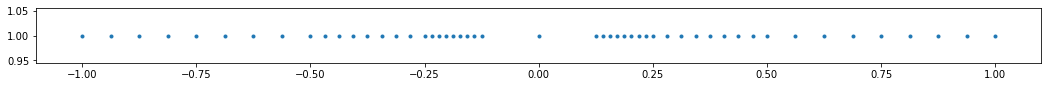

In [7]:
plot_floats(base=2, precision=4, l=-3, u=3)

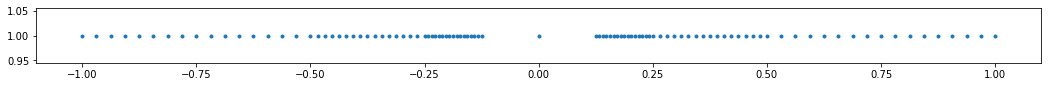

In [8]:
plot_floats(base=2, precision=5, l=-3, u=3)

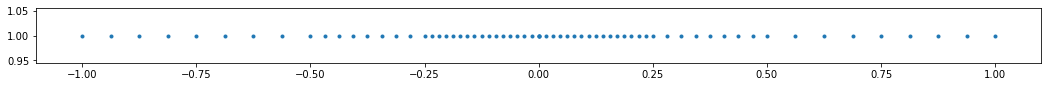

In [9]:
plot_floats(base=2, precision=4, l=-3, u=3, denorm=True)

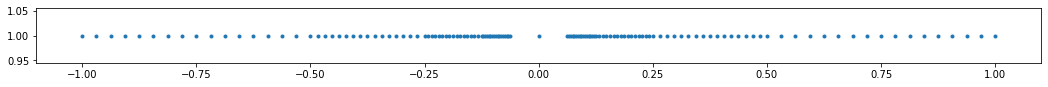

In [10]:
plot_floats(base=2, precision=5, l=-4, u=4)

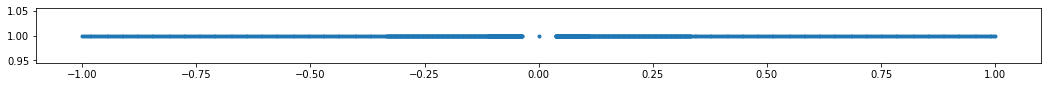

In [11]:
plot_floats(base=3, precision=5, l=-3, u=3)

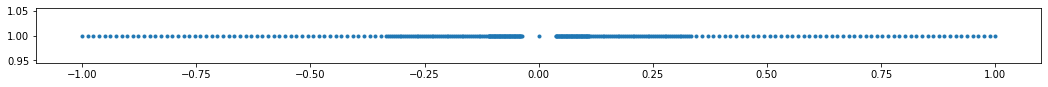

In [12]:
plot_floats(base=3, precision=4, l=-3, u=3)

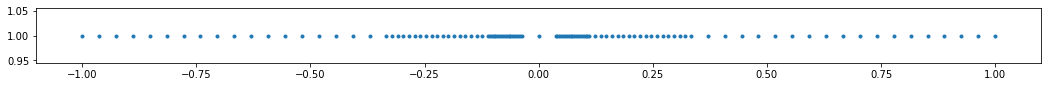

In [13]:
plot_floats(base=3, precision=3, l=-3, u=3)

In [14]:
# compute e^x by summing the first n terms of its taylor series expansion
def e(x, n):
    return sum(pow(x,i)/math.factorial(i) for i in range(n))

In [17]:
# let's comput e^(-40)
for n in range(0,220,10):
    print(n, e(-40, n))

0 0
10 -587434526.4779541
20 -15234692665065.688
30 -1878147717496763.5
40 -7454992785190285.0
50 -2327015884886823.0
60 -96230545639823.6
70 -742906457189.6375
80 -1365164448.1407766
90 -715794.8214456332
100 -123.09303988190482
110 0.13923257920767423
120 0.14702625107977826
130 0.14702644947835636
140 0.14702644948055016
150 0.1470264494805502
160 0.1470264494805502
170 0.1470264494805502
180 0.1470264494805502
190 0.1470264494805502
200 0.1470264494805502
210 0.1470264494805502


In [18]:
math.exp(-40)

4.248354255291589e-18

In [20]:
from decimal import *
getcontext().prec = 4
one = Decimal(1)
e = one
while one+e > one:
    print(e)
    e = e/Decimal(10)
print(e)

1
0.1
0.01
0.001
0.0001


In [22]:
((one+e)+e)+e

Decimal('1.0003')

In [23]:
one+e

Decimal('1.0001')

In [24]:
e=1
while e+1>1:
    print(e)
    e=e/10
print(e)

1
0.1
0.01
0.001
0.0001
1e-05
1.0000000000000002e-06
1.0000000000000002e-07
1.0000000000000002e-08
1.0000000000000003e-09
1.0000000000000003e-10
1.0000000000000003e-11
1.0000000000000002e-12
1.0000000000000002e-13
1.0000000000000002e-14
1e-15
1.0000000000000001e-16


In [25]:
1+e


1.0

In [26]:
eps=e*10
1+eps

1.000000000000001

In [27]:
eps = 1
e = 1
while 1+e>1:
    eps = e
    e=e/10
print(eps)

1e-15


In [28]:
1+eps

1.000000000000001

In [33]:
a=0.1*eps
1+a

1.0

In [36]:
((((((((((1+a)+a)+a)+a)+a)+a)+a)+a)+a)+a)

1.0

In [45]:
(1+(a+(a+(a+(a+(a+(a+(a+(a+(a+a))))))))))

1.000000000000001

In [46]:
a,eps

(1.0000000000000001e-16, 1e-15)

In [48]:
a = 0.1*eps
print(((((((((((1+a)+a)+a)+a)+a)+a)+a)+a)+a)+a))
print((1+(a+(a+(a+(a+(a+(a+(a+(a+(a+a)))))))))))

1.0
1.000000000000001


In [49]:
print(1+a+a+a+a+a+a+a+a+a+a)
print(a+a+a+a+a+a+a+a+a+a+1)

1.0
1.000000000000001


In [50]:
1+a,a+1

(1.0, 1.0)

In [51]:
s=a+a

In [52]:
print(s)
s=s+a
print(s)

2.0000000000000002e-16
3.0000000000000004e-16


In [ ]:
ufl=1
u=1
while u > 0:
    u=ufl
    u=u/10
    print(u)
print(ufl)